<a href="https://colab.research.google.com/github/JunFin/CalcNSModel/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Задание 1

'''
Задание 1. По номеру варианта определить из таблицы 1 тип входных данных, которые
надо программно сгенерировать для дальнейшей обработки, и номера алгоритмов, которые
следует применить к этим данным.
'''


In [ ]:
'''
Вариант 14.

Входные данные (4): Случайные точки трёхмерного пространства,
лежащие на поверхности сегмента сферы x^2+y^2+z^2 = 4, x ≥ 0, y ≥ 0, z ≥ 0
и имеющие на этой поверхности любое произвольно выбранное распределение.

Алгоритмы (1, 3):
 - Линейная регрессия или полиномиальная регрессия
(по выбору студента)
 - RANSAC
'''

In [ ]:
# Задание 2

'''
Задание 2. Определить из таблицы 2 вид входных данных, которые должны быть обработаны.
Программно сгенерировать эти данные, вывести их в виде графика (диаграммы разброса).

Количество прецедентов должно задаваться одной из переменных программы, чтобы допустить
лёгкое изменение в процессе тестирования. Регрессионные модели должны предсказывать
значения последней из координат точек по остальным.
'''


In [49]:
import numpy as np

def make_sample(num_of_points):
    points = np.random.normal(size=(num_of_points, 3))
    points = np.abs(points)
    points /= np.linalg.norm(points, axis=1, keepdims=True)
    points *= 2
    return points

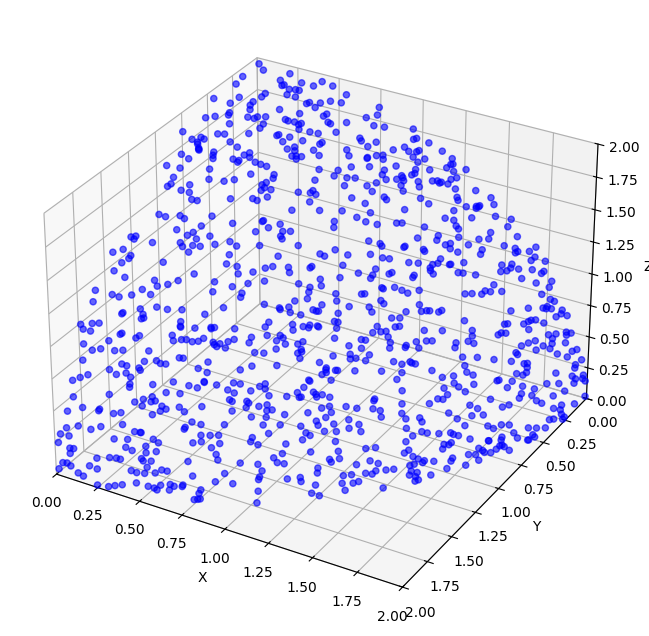

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



points = make_sample(1000)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           s=20, alpha=0.6, c='blue')

# Настраиваем график
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 2])
ax.set_ylim([2, 0])
ax.set_zlim([0, 2])

plt.show()


In [ ]:
# Задание 3

'''
Задание 3. Определить по таблице 3 методы обработки данных. Следует обработать выборку
каждым из методов по отдельности и сравнить точности полученных регрессионных
моделей (среднеквадратические значения ошибок на использованных выборках).
Значения настроечных коэффициентов, если они требуются, следует выбрать самостоятельно;
нулевые значения этих коэффициентов не допускаются.
'''


In [26]:
def linear_regression(X, y):
    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

    # w = (X^T X)^(-1) X^T y
    XT = X_with_intercept.T
    XTX = np.dot(XT, X_with_intercept)
    XTX_inv = np.linalg.inv(XTX)
    w = np.dot(np.dot(XTX_inv, XT), y)
    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
    return np.dot(X_with_intercept, w), w


def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


In [40]:
X = points[:, :2]
y = points[:, 2]

y_pred, w = linear_regression(X, y)


lin_r2_score = r2(y, y_pred)

In [37]:
from ipywidgets import interact, FloatSlider


def plot_3d(elev=30, azim=45, roll=0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
              s=20, alpha=0.3, c='blue')

    ax.scatter(X[:, 0], X[:, 1], y_pred,
           s=20, alpha=0.3, c='red')

    ax.view_init(elev=elev, azim=azim)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Линейная регрессия')
    ax.set_xlim([0, 2])
    ax.set_ylim([2, 0])
    ax.set_zlim([0, 2])
    ax.set_box_aspect([1, 1, 1])

    plt.tight_layout()
    plt.show()


interact(plot_3d,
         elev=FloatSlider(min=0, max=90, step=5, value=0, description='Elevation'),
         azim=FloatSlider(min=0, max=360, step=5, value=45, description='Azimuth'))


interactive(children=(FloatSlider(value=0.0, description='Elevation', max=90.0, step=5.0), FloatSlider(value=4…

<function __main__.plot_3d(elev=30, azim=45, roll=0)>

In [43]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

reg = RANSACRegressor(random_state=0).fit(X, y)
RANSAC_r2_score = reg.score(X, y)

print(lin_r2_score - RANSAC_r2_score)

0.0005254042571062323


In [45]:
y_ransac = reg.predict(X)


def plot_3d(elev=30, azim=45, roll=0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
              s=20, alpha=0.3, c='blue')

    ax.scatter(X[:, 0], X[:, 1], y_pred,
           s=20, alpha=0.3, c='red')

    ax.scatter(X[:, 0], X[:, 1], y_ransac,
           s=20, alpha=0.3, c='yellow')

    ax.view_init(elev=elev, azim=azim)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Линейная регрессия')
    ax.set_xlim([0, 2])
    ax.set_ylim([2, 0])
    ax.set_zlim([0, 2])
    ax.set_box_aspect([1, 1, 1])

    plt.tight_layout()
    plt.show()


interact(plot_3d,
         elev=FloatSlider(min=0, max=90, step=5, value=0, description='Elevation'),
         azim=FloatSlider(min=0, max=360, step=5, value=45, description='Azimuth'))


interactive(children=(FloatSlider(value=0.0, description='Elevation', max=90.0, step=5.0), FloatSlider(value=4…

<function __main__.plot_3d(elev=30, azim=45, roll=0)>

In [ ]:
# Задание 4

'''
Задание 4. Создать новую выборку данных такого же размера и сравнить точность моделей
на старой и новой выборках. Сделать вывод о сохранении точностных характеристик каждой
из моделей.
'''


In [53]:
new_sample = make_sample(1000)

X = points[:, :2]
y = points[:, 2]

y_pred, w = linear_regression(X, y)


lin_r2_score = r2(y, y_pred)

reg = RANSACRegressor(random_state=0).fit(X, y)
RANSAC_r2_score = reg.score(X, y)

print(lin_r2_score - RANSAC_r2_score)

0.029946914901533894


In [ ]:
'''
ransac устойчив к выбросам и показывает стабильно хорошие результаты, на практике, не отличимые от линейной регрессии, буквально являющейся идеальным результатом.
'''